<a href="https://colab.research.google.com/github/Aondona93/D-analytics/blob/main/Geopandas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE:HOTSPOT MAPPING OF M&E KPIs IN OSUN STATE BY LGA

In [2]:
#!pip install pysal #for Construction and interactive editing of spatial weights matrices & graphs
#!pip install contextily #contextily is a small package to retrieve and write to disk tile maps from the internet into geospatial raster files


In [3]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
#import descartes
import geopandas as gpd#Libary for Geopspatial Analysis
from shapely.geometry import Point, Polygon# modules for geop analysis
from pysal.lib import weights # for weight assignment on hotspot maps
from pysal.explore import esda
from esda import getisord#for clustering
import numpy as np# for numerical analysis
from libpysal.weights import KNN # for clustering
from scipy.stats import zscore # for cluster assignments
from matplotlib.lines import Line2D # for dynamic mapping
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


### Load and Inspect The Shapefile

In [7]:
data=gpd.read_file('/content/GRID3_NGA_-_Operational_LGA_Boundaries.shp')
data.head()

,FID,globalid,uniq_id,timestamp,editor,lganame,lgacode,statename,statecode,source,amapcode,Shape__Are,Shape__Len,geometry
0,1,03e7c550-533e-4a1b-9d39-0cc33fa7b992,28920,2019-08-09,nuraddeen.isah,Eastern Obolo,3002,Akwa Ibom,AK,eHA_Polio,NIE AKS KRT,0.012883,0.664376,"POLYGON ((7.64122 4.48428, 7.62169 4.47325, 7...."
1,2,fb8437ba-302a-4398-8c60-599d29d818ab,28922,2019-08-09,nuraddeen.isah,Ekeremor,6002,Bayelsa,BY,eHA_Polio,NIE BYS KMR,0.149653,2.176681,"POLYGON ((5.96322 5.0903, 5.96684 5.08214, 5.9..."
2,3,6dd43980-dc31-4b23-af8d-76a5690b8b13,28925,2019-08-09,najib.adam,Degema,33008,Rivers,RI,eHA_Polio,NIE RVS DEG,0.054139,1.398593,"POLYGON ((6.95485 4.37353, 6.85818 4.39824, 6...."
3,4,f7345210-4fc2-43ab-b2c8-f435a8c120f4,28927,2019-08-09,nuraddeen.isah,Andoni,33005,Rivers,RI,eHA_Polio,NIE RVS NDN,0.027831,1.025188,"POLYGON ((7.41845 4.43153, 7.40667 4.43362, 7...."
4,5,8cdb745d-8605-44cd-b28f-43318af764c7,28930,2020-08-31,najib.adam,Akpabuyo,9003,Cross River,CR,GRID,NIE CRS KTA,0.063946,1.444187,"POLYGON ((8.58399 4.8868, 8.58424 4.85488, 8.5..."


### Plot The Map Of Nigeria

<Axes: >

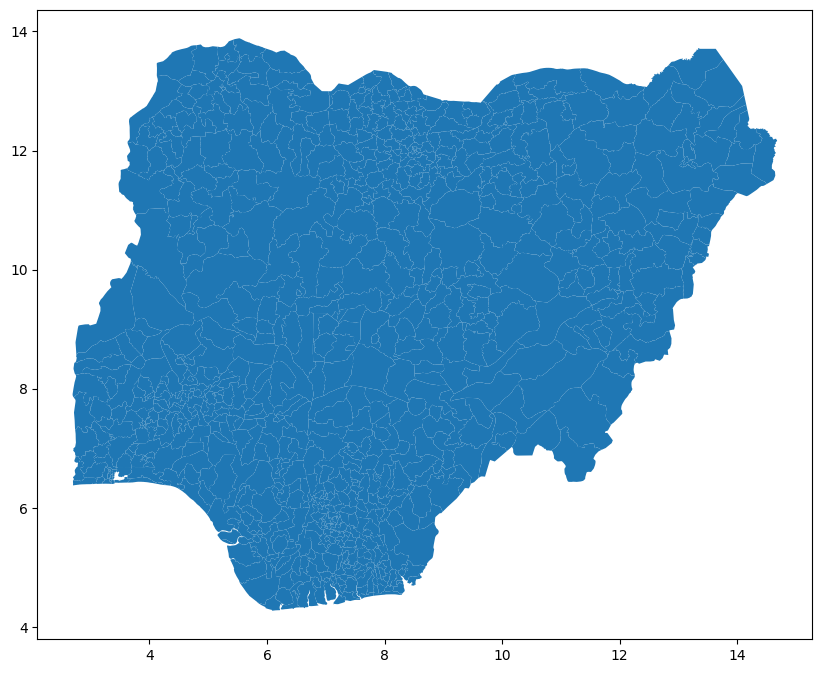

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
data.plot(ax=ax)

### Extract The Shapefile For Osun State

In [8]:
osun_state = data[data['statename'] == 'Osun']
osun_state.head()

,FID,globalid,uniq_id,timestamp,editor,lganame,lgacode,statename,statecode,source,amapcode,Shape__Are,Shape__Len,geometry
35,36,ba9ce4cf-c6bc-4cce-aee5-e2726c172b6a,28145,2020-02-10,najib.adam,Isokan,30022,Osun,OS,IPD_Campaign,NIE OSS APM,0.021750,0.738212,"POLYGON ((4.23003 7.23011, 4.21843 7.22639, 4...."
36,37,b8a66a2a-f429-4d30-809a-f33b0bfdd1a2,28146,2020-02-10,najib.adam,Irewole,30021,Osun,OS,IPD_Campaign,NIE OSS KRE,0.023394,0.682591,"POLYGON ((4.24922 7.34134, 4.24917 7.34465, 4...."
50,51,e6a65dfe-9ee7-4514-8270-3ce30f12de0f,28149,2020-02-10,najib.adam,Ife North,30013,Osun,OS,IPD_Campaign,NIE OSS PMD,0.035492,1.072788,"POLYGON ((4.51874 7.24976, 4.51682 7.2481, 4.5..."
51,52,2cbf968a-276a-43e5-a6d1-779ef54b8a9a,28147,2020-02-10,najib.adam,Ayedade,30001,Osun,OS,IPD_Campaign,NIE OSS GBN,0.081189,2.157202,"POLYGON ((4.39773 7.25062, 4.39778 7.24669, 4...."
52,53,69612f05-7505-41ff-910e-51cd6c21f4c7,28148,2020-02-10,najib.adam,Ayedire,30002,Osun,OS,IPD_Campaign,NIE OSS LGB,0.022084,0.751818,"POLYGON ((4.33585 7.60685, 4.34702 7.58378, 4...."


### Area Mapping Of Osun State

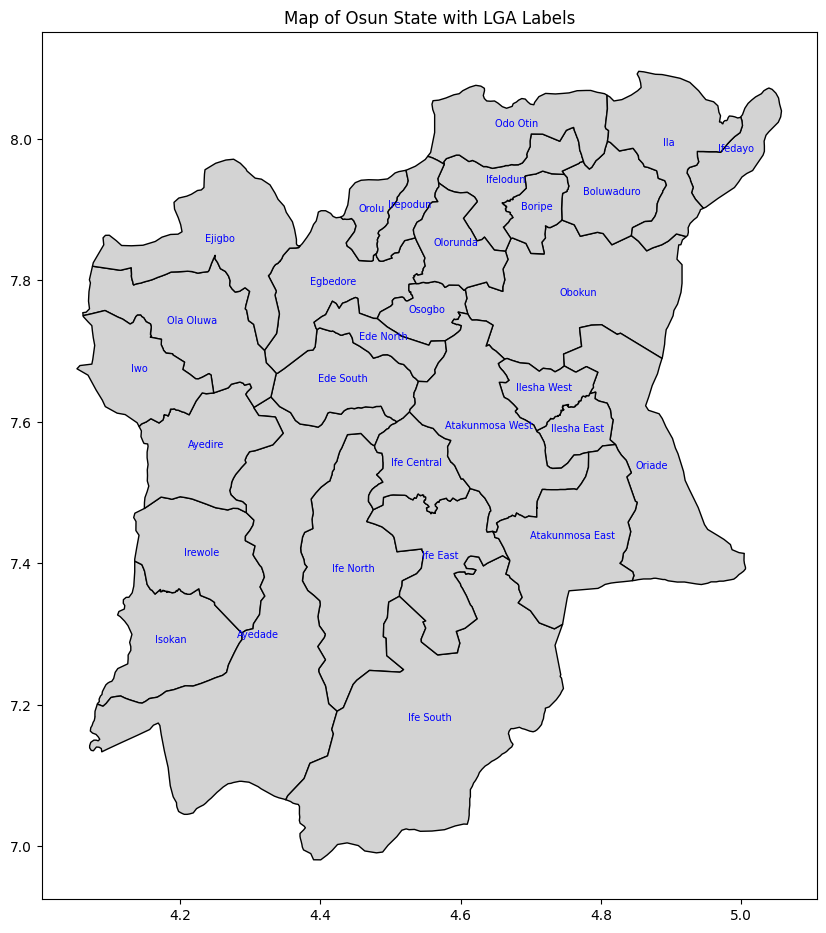

In [ ]:
import matplotlib.pyplot as plt

# Plot the map
fig, ax = plt.subplots(figsize=(10, 15))
osun_state.plot(ax=ax, color='lightgrey', edgecolor='black')

# Label each LGA with its name
for idx, row in osun_state.iterrows():
    # Get the centroid of the geometry
    centroid = row.geometry.centroid
    # Add the label at the centroid
    ax.annotate(
        text=row['lganame'],
        xy=(centroid.x, centroid.y),
        ha='center', fontsize=7, color='blue'
    )

plt.title("Map of Osun State with LGA Labels")
plt.show()


**Load and Explore The indicator csv file**

In [12]:
# Load the csv file
treatment_data = pd.read_csv("/content/shapefile_lga_names.csv")
treatment_data.head()

,lganame,TX_Cur,TX_New,HTS_Pos
0,ATAKUNMOSA EAST,50,0,0
1,ATAKUNMOSA WEST,305,0,0
2,AYEDADE,615,1,1
3,AYEDIRE,70,0,0
4,BOLUWADURO,50,0,0


**Data Cleaning and Preprocessing**

In [16]:
# Standardize LGA names for merging
osun_state["lganame"] = osun_state["lganame"].str.upper().str.strip()
treatment_data["lganame"] = treatment_data["lganame"].str.upper().str.strip()
# Merge shapefile with treatment data
merged = osun_state.merge(treatment_data, left_on="lganame", right_on="lganame", how="left")
merged.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,FID,globalid,uniq_id,timestamp,editor,lganame,lgacode,statename,statecode,source,amapcode,Shape__Are,Shape__Len,geometry,TX_Cur,TX_New,HTS_Pos
0,36,ba9ce4cf-c6bc-4cce-aee5-e2726c172b6a,28145,2020-02-10,najib.adam,ISOKAN,30022,Osun,OS,IPD_Campaign,NIE OSS APM,0.021750,0.738212,"POLYGON ((4.23003 7.23011, 4.21843 7.22639, 4....",1037,0,6
1,37,b8a66a2a-f429-4d30-809a-f33b0bfdd1a2,28146,2020-02-10,najib.adam,IREWOLE,30021,Osun,OS,IPD_Campaign,NIE OSS KRE,0.023394,0.682591,"POLYGON ((4.24922 7.34134, 4.24917 7.34465, 4....",955,3,3
2,51,e6a65dfe-9ee7-4514-8270-3ce30f12de0f,28149,2020-02-10,najib.adam,IFE NORTH,30013,Osun,OS,IPD_Campaign,NIE OSS PMD,0.035492,1.072788,"POLYGON ((4.51874 7.24976, 4.51682 7.2481, 4.5...",622,2,2
3,52,2cbf968a-276a-43e5-a6d1-779ef54b8a9a,28147,2020-02-10,najib.adam,AYEDADE,30001,Osun,OS,IPD_Campaign,NIE OSS GBN,0.081189,2.157202,"POLYGON ((4.39773 7.25062, 4.39778 7.24669, 4....",615,1,1
4,53,69612f05-7505-41ff-910e-51cd6c21f4c7,28148,2020-02-10,najib.adam,AYEDIRE,30002,Osun,OS,IPD_Campaign,NIE OSS LGB,0.022084,0.751818,"POLYGON ((4.33585 7.60685, 4.34702 7.58378, 4....",70,0,0


**Point Mapping of Indicators**

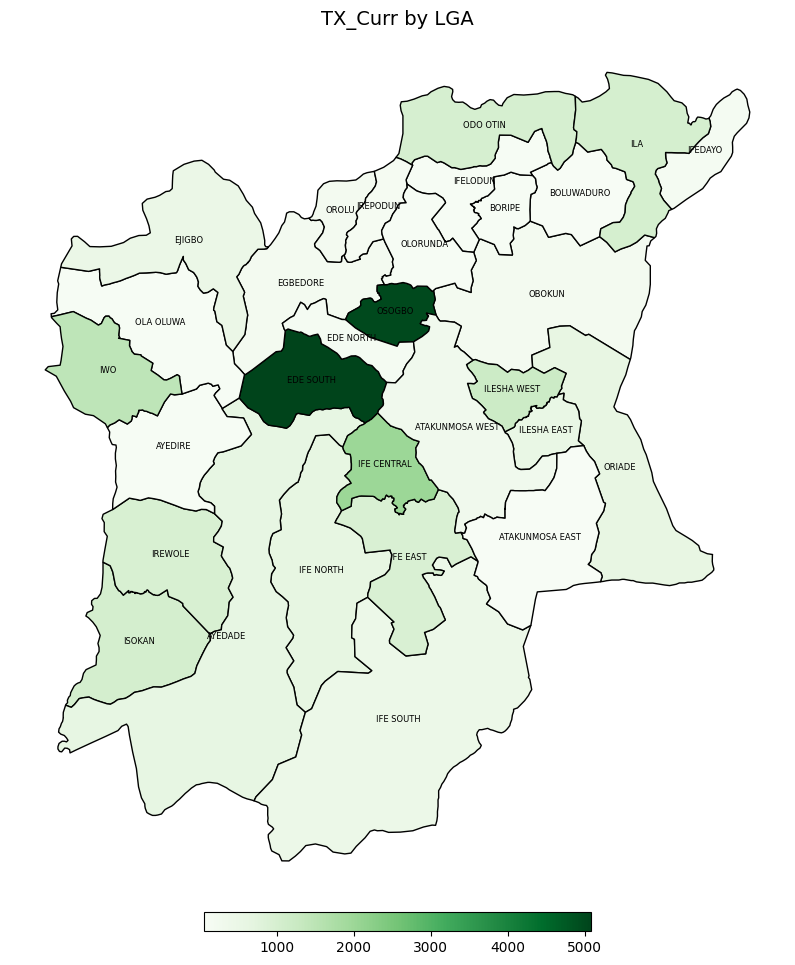

In [19]:
# Plot map with color gradient for TX_CUR
fig, ax = plt.subplots(figsize=(10, 15))
merged.plot(
    column='TX_Cur',
    ax=ax,
    cmap='Greens',
    edgecolor='black',
    legend=True,
    legend_kwds={
        'orientation': "horizontal",
        'shrink': 0.5,
        'pad': 0.01
    }
)

# Annotate LGA names
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['lganame'],
            xy=(centroid.x, centroid.y),
            ha='center', fontsize=6, color='black'
        )

# Add title and remove axis
plt.title("TX_Curr by LGA", fontsize=14)
plt.axis('off')
plt.show()


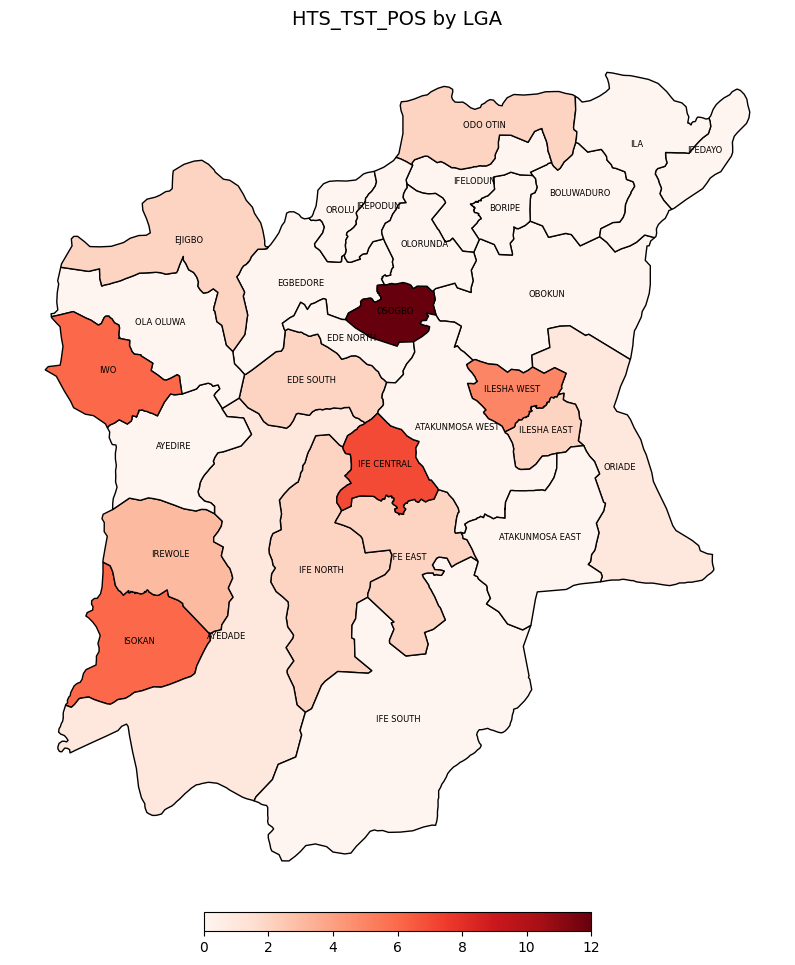

In [20]:
# Plot map with color gradient for HTS_POS
fig, ax = plt.subplots(figsize=(10, 15))
merged.plot(
    column='HTS_Pos',
    ax=ax,
    cmap='Reds',
    edgecolor='black',
    legend=True,
    legend_kwds={
        'orientation': "horizontal",
        'shrink': 0.5,
        'pad': 0.01
    }
)

# Annotate LGA names
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['lganame'],
            xy=(centroid.x, centroid.y),
            ha='center', fontsize=6, color='black'
        )

# Add title and remove axis
plt.title("HTS_TST_POS by LGA", fontsize=14)
plt.axis('off')
plt.show()


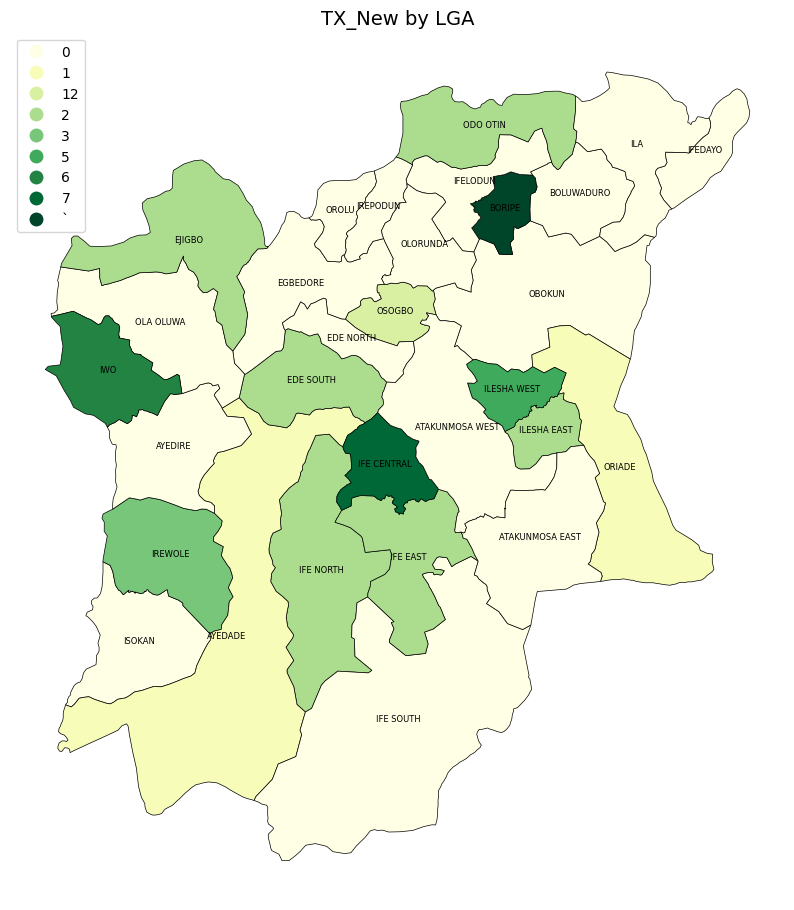

In [21]:
# Plot map with color gradient for TX_New
fig, ax = plt.subplots(figsize=(10, 15))
merged.plot(
    column='TX_New',
    cmap='YlGn',
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=True
)

# Annotate LGA names
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['lganame'],
            xy=(centroid.x, centroid.y),
            ha='center', fontsize=6, color='black'
        )

# Add title and remove axis
plt.title("TX_New by LGA", fontsize=14)
plt.axis('off')
plt.show()


## Hotspot Analysis

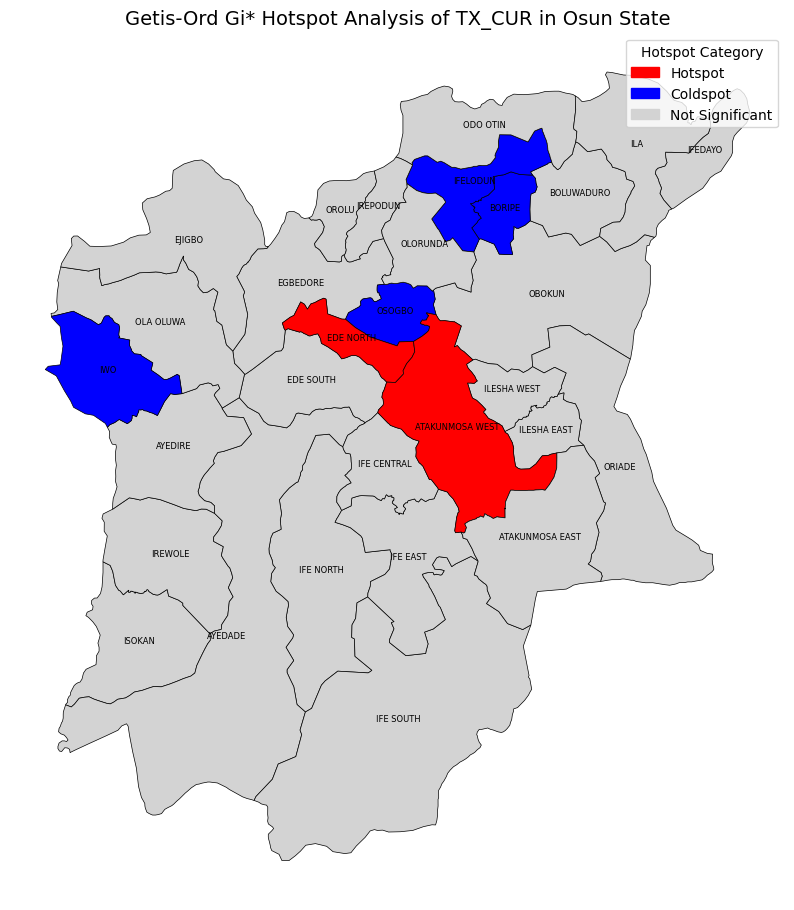

In [22]:
# Step 1: Prepare data

# Ensure the data column is float and no missing values
merged['TX_Cur'] = merged['TX_Cur'].astype(float)
merged = merged.dropna(subset=['TX_Cur'])

# Step 2: Create spatial weights matrix (Queen contiguity)
w = weights.Queen.from_dataframe(merged, use_index=True)
w.transform = 'r'  # row-standardization

# Step 3: Extract values as numpy array (float)
tx_cur_values = merged['TX_Cur'].values.astype(float)

# Step 4: Calculate Getis-Ord Gi* statistic
gi_star = getisord.G_Local(tx_cur_values, w)

# Step 5: Add Gi* scores and p-values to GeoDataFrame
merged['GiZScore'] = gi_star.Zs
merged['GiPValue'] = gi_star.p_sim

# Step 6: Define hotspot categories based on Gi* Z-scores and p-values
def hotspot_category(z, p):
    if p <= 0.05 and z > 0:
        return 'Hotspot'
    elif p <= 0.05 and z < 0:
        return 'Coldspot'
    else:
        return 'Not Significant'

merged['Hotspot'] = [hotspot_category(z, p) for z, p in zip(merged['GiZScore'], merged['GiPValue'])]

# Step 7: Plotting the hotspot map
fig, ax = plt.subplots(figsize=(10, 15))

# Color map for hotspot categories
colors = {
    'Hotspot': 'red',
    'Coldspot': 'blue',
    'Not Significant': 'lightgrey'
}

merged['color'] = merged['Hotspot'].map(colors)

merged.plot(color=merged['color'], edgecolor='black', linewidth=0.5, ax=ax)

# Annotate LGA names
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['lganame'],
            xy=(centroid.x, centroid.y),
            ha='center',
            fontsize=6,
            color='black'
        )

plt.title('Getis-Ord Gi* Hotspot Analysis of TX_CUR in Osun State', fontsize=14)
plt.axis('off')

# Create a custom legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=c, label=l) for l, c in colors.items()]
ax.legend(handles=legend_handles, title='Hotspot Category')

plt.show()


The Getis-Ord Gi* statistic identifies clusters based on local spatial autocorrelation — which means it checks whether high or low values are clustered relative to their neighbors — not just on raw values alone.

*   Coldspot (blue) = Significant cluster of low values around that area — Osogbo and Iwo are surrounded by areas with even higher TX_CUR values, their relative values appear lower in the local context.
*   Conversely, a hotspot (red) is where high values cluster together relative to neighbors.

*   Non-significant means no strong local clustering pattern.

*  Context of neighbors: Gi* statistic compares each area's value to its neighbors — so even if a location has a high absolute value, if neighbors have similarly high or higher values, it may not be a hotspot.









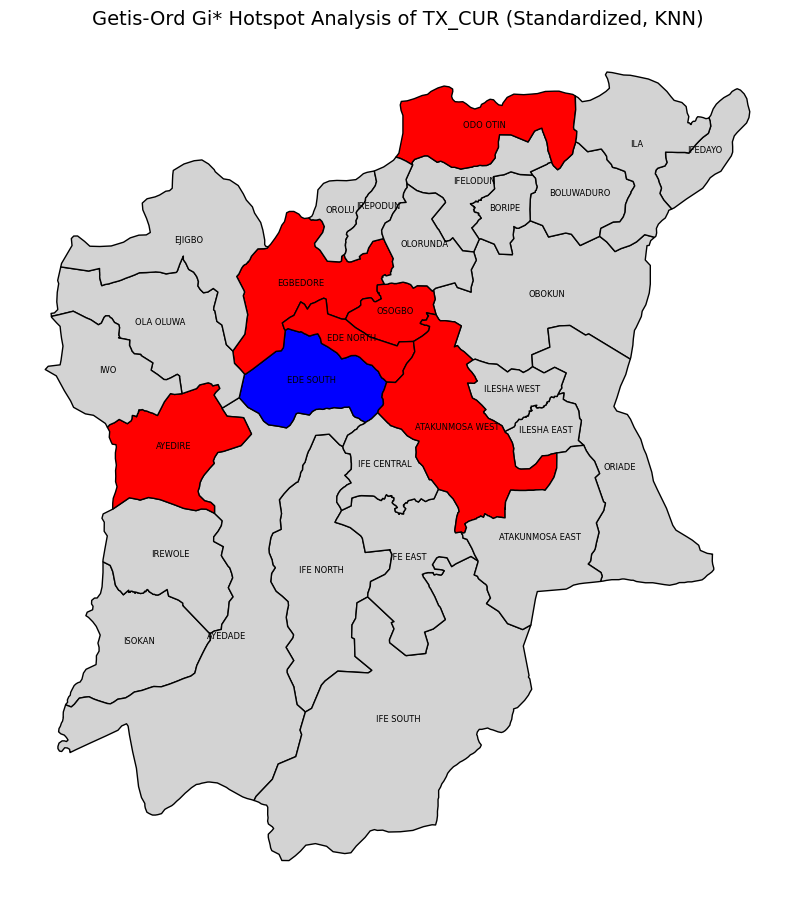

In [23]:
from scipy.stats import zscore

# Step 1: Standardize TX_CUR using z-score
merged['TX_CUR_std'] = zscore(merged['TX_Cur'].fillna(0))  # fillna if needed

# Step 2: Create KNN spatial weights (e.g., 4 neighbors)
w_knn = KNN.from_dataframe(merged, k=4)
w_knn.transform = 'r'  # row-standardize weights

# Step 3: Calculate Getis-Ord Gi* using standardized values
gi_star = getisord.G_Local(merged['TX_CUR_std'].values, w_knn)

# Step 4: Add Gi* results to dataframe
merged['GiZScore'] = gi_star.Zs
merged['GiPValue'] = gi_star.p_sim
merged['GiSignificant'] = gi_star.p_sim < 0.05  # flag significant clusters

# Step 5: Classify hotspot / coldspot / non-significant
def classify_hotspot(row):
    if not row['GiSignificant']:
        return 'Not Significant'
    elif row['GiZScore'] > 0:
        return 'Hotspot'
    else:
        return 'Coldspot'

merged['Hotspot_Class'] = merged.apply(classify_hotspot, axis=1)

# Step 6: Plotting
fig, ax = plt.subplots(figsize=(10, 15))
color_dict = {'Hotspot': 'red', 'Coldspot': 'blue', 'Not Significant': 'lightgrey'}

merged.plot(color=merged['Hotspot_Class'].map(color_dict), ax=ax, edgecolor='black')

# Annotate LGAs
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['lganame'],
            xy=(centroid.x, centroid.y),
            ha='center', fontsize=6, color='black'
        )

plt.title("Getis-Ord Gi* Hotspot Analysis of TX_CUR (Standardized, KNN)", fontsize=14)
plt.axis('off')
plt.show()


explain the insights from the standardized KNN hotspot mapping of tx_cur
ChatGPT said:
The standardized KNN hotspot mapping of the TX_Cur variable (current number of people on antiretroviral therapy) using Getis-Ord Gi* (G*) spatial statistic reveals geographic patterns of high and low concentrations of HIV treatment coverage across Local Government Areas (LGAs).
1. Red Areas = Hotspots

*   A high number of HIV-positive individuals currently on treatment.
*   Strong health infrastructure or programmatic presence (e.g., more HIV clinics, higher population, active case finding).
2. Blue Areas = Coldspots

*   Surrounded with areas of high TX_cur(for an LGA with a very high TX_cur) thus weakens the zone by reducing the burden influence to other LGAs)
*   Surrounded with some areas of very low TX_cur( for an LGA with a high TX_cur) thus becoming a coldspot while rendering those low burden LGAs as Hotspots due to ease of spread.
3. Grey/Transparent Areas = Non-significant

*   TX_Cur values are not statistically different from neighboring LGAs.
*   These areas show average ART coverage without spatial clustering.





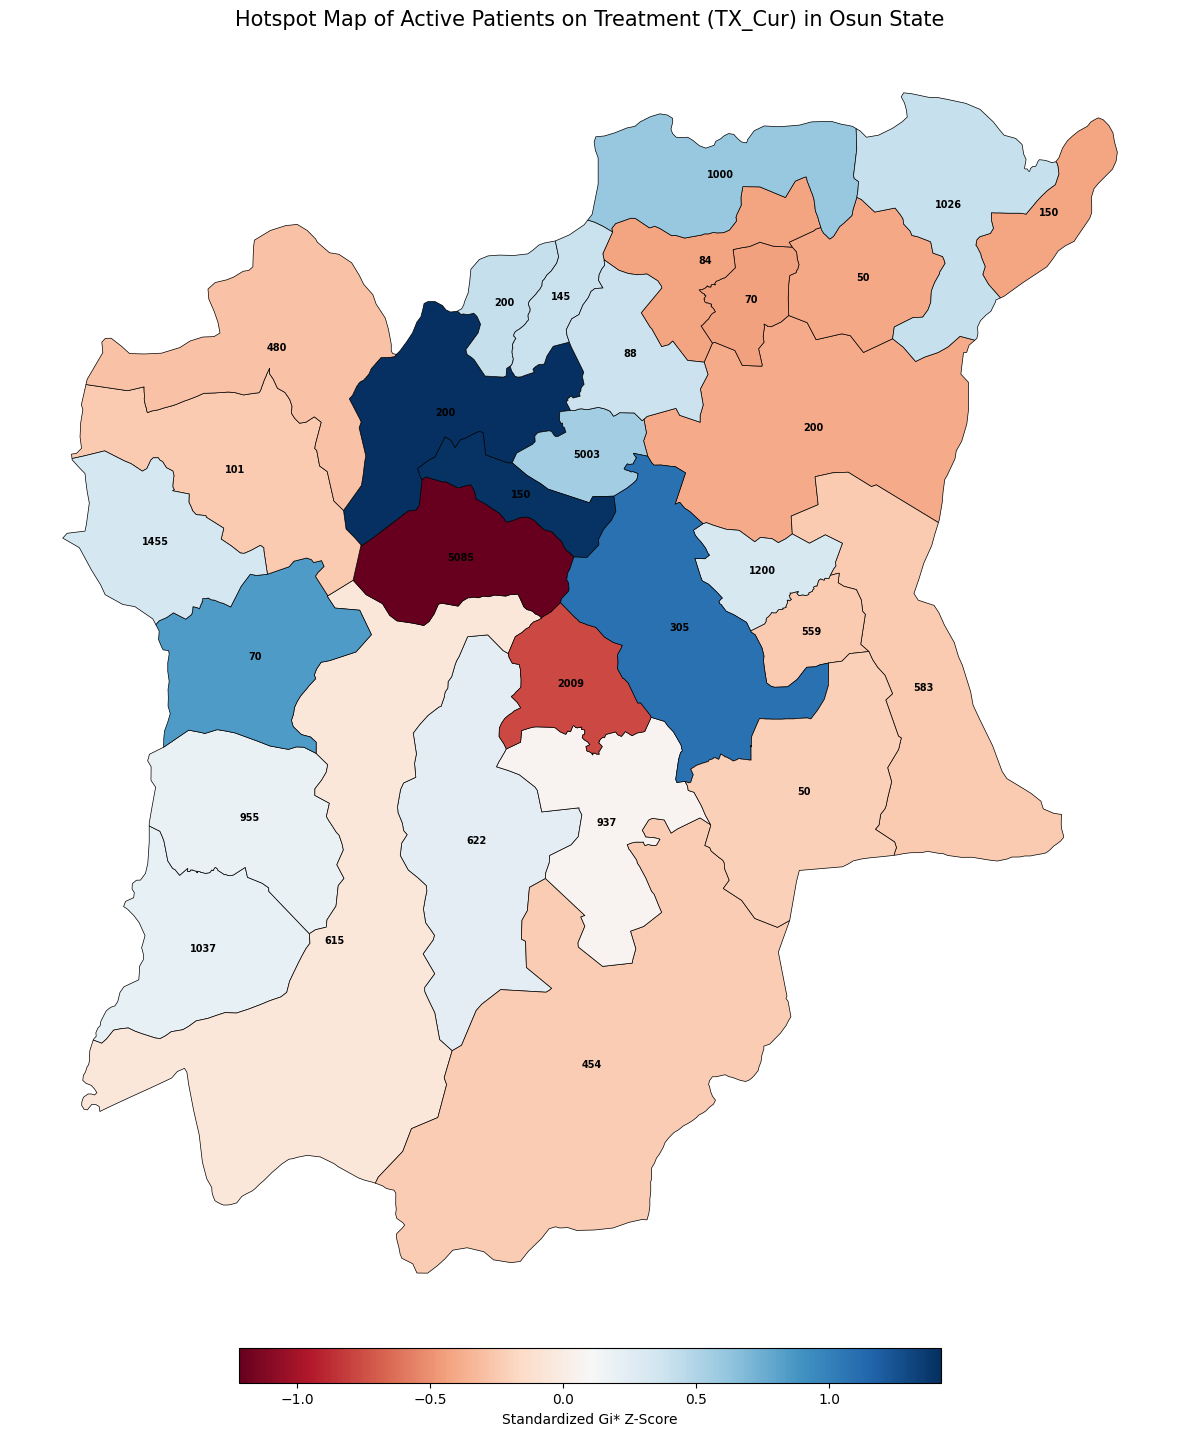

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 16))

# Plot the map colored by GiZScore
merged.plot(
    column='GiZScore',
    cmap='RdBu',
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=True,
    legend_kwds={
        'orientation': "horizontal",
        'shrink': 0.6,
        'pad': 0.01,
        'label': "Standardized Gi* Z-Score"
    }
)

# Add TX_Cur labels at the centroid of each LGA
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        label = row['TX_Cur']
        if not pd.isnull(label):
            ax.annotate(
                text=str(int(label)),
                xy=(centroid.x, centroid.y),
                ha='center',
                va='center',
                fontsize=7,
                color='black',
                weight='bold'
            )

# Format plot
plt.title("Hotspot Map of Active Patients on Treatment (TX_Cur) in Osun State", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


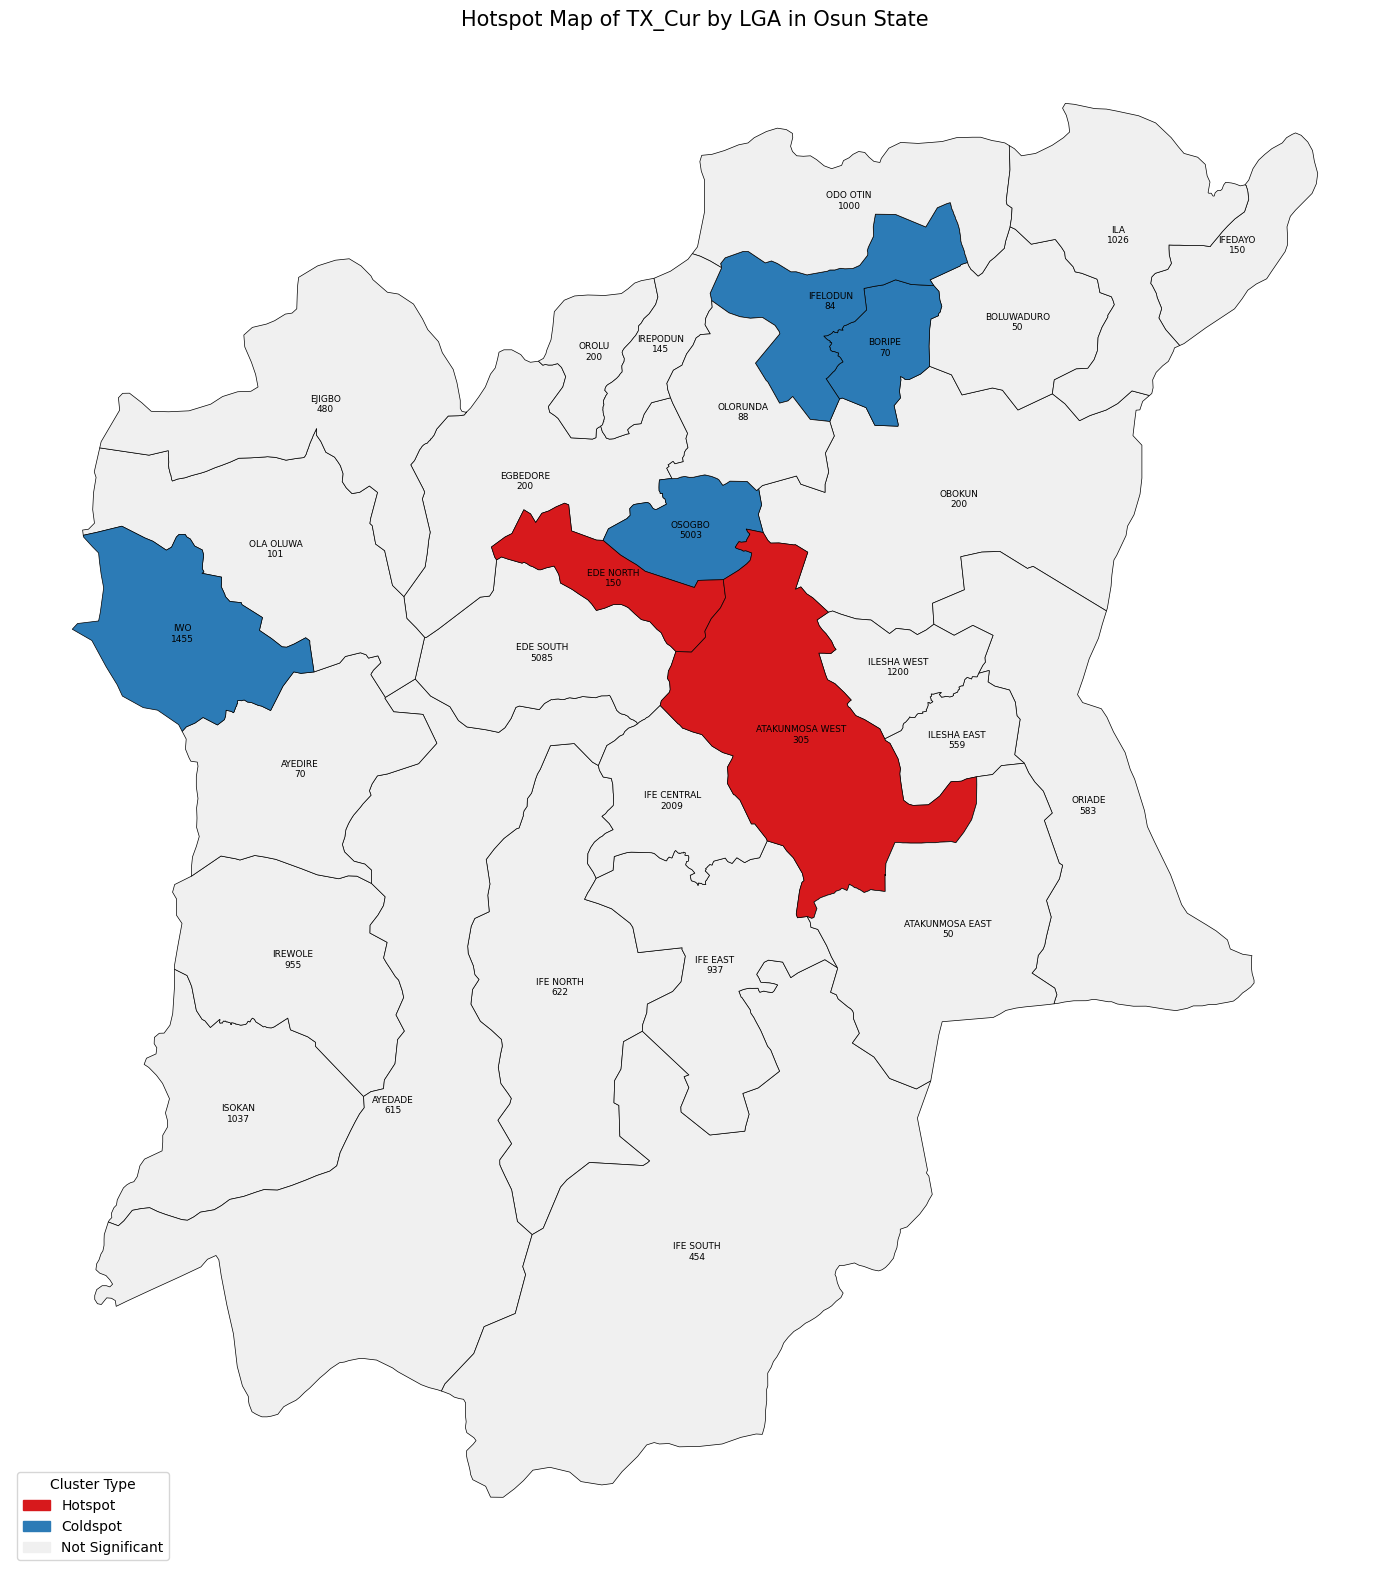

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(14, 16))

# Define custom colors for hotspot classification
color_dict = {
    'Hotspot': '#d7191c',        # Red
    'Coldspot': '#2c7bb6',       # Blue
    'Not Significant': '#f0f0f0' # Light gray
}

# Assign colors from classification
merged['spot_color'] = merged['Hotspot'].map(color_dict)

# Plot polygons
merged.plot(
    color=merged['spot_color'],
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Add LGA labels and TX_Cur at centroids
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        lga_name = row['lganame']
        tx_cur = row['TX_Cur']
        label = f"{lga_name}\n{int(tx_cur)}"
        ax.annotate(
            text=label,
            xy=(centroid.x, centroid.y),
            ha='center',
            va='center',
            fontsize=6.5,
            color='black'
        )

# Add a custom legend
legend_patches = [
    mpatches.Patch(color=color_dict['Hotspot'], label='Hotspot'),
    mpatches.Patch(color=color_dict['Coldspot'], label='Coldspot'),
    mpatches.Patch(color=color_dict['Not Significant'], label='Not Significant')
]
ax.legend(handles=legend_patches, title='Cluster Type', loc='lower left')

# Final formatting
plt.title("Hotspot Map of TX_Cur by LGA in Osun State", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


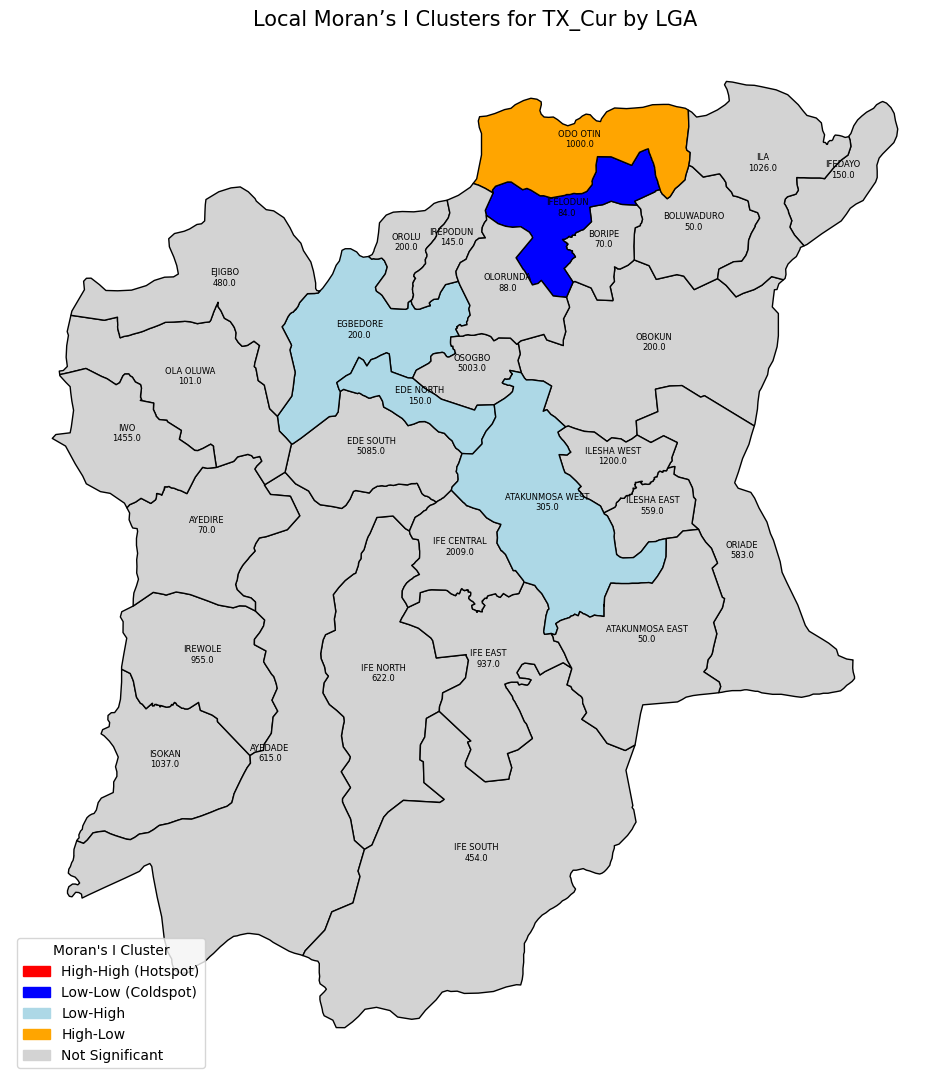

In [26]:
from esda.moran import Moran_Local
import numpy as np

# Step 1: Load and prepare data (assuming 'merged' is your GeoDataFrame)
gdf = merged.copy()

# Step 2: Standardize TX_Cur values
gdf['TX_Cur_std'] = (gdf['TX_Cur'] - gdf['TX_Cur'].mean()) / gdf['TX_Cur'].std()

# Step 3: Create spatial weights matrix using KNN
w = KNN.from_dataframe(gdf, k=5)
w.transform = 'r'  # Row-standardized weights

# Step 4: Run Local Moran's I
moran_loc = Moran_Local(gdf['TX_Cur_std'], w)

# Step 5: Extract results and classify
gdf['Moran_I'] = moran_loc.Is
gdf['p_value'] = moran_loc.p_sim
gdf['cluster'] = moran_loc.q  # quadrant: 1=HH, 2=LH, 3=LL, 4=HL

# Define cluster category
def classify_cluster(row):
    if row['p_value'] > 0.05:
        return 'Not Significant'
    elif row['cluster'] == 1:
        return 'High-High (Hotspot)'
    elif row['cluster'] == 2:
        return 'Low-High'
    elif row['cluster'] == 3:
        return 'Low-Low (Coldspot)'
    elif row['cluster'] == 4:
        return 'High-Low'
    else:
        return 'Undefined'

gdf['cluster_type'] = gdf.apply(classify_cluster, axis=1)

# Step 6: Plot
fig, ax = plt.subplots(figsize=(12, 16))
cluster_colors = {
    'High-High (Hotspot)': 'red',
    'Low-Low (Coldspot)': 'blue',
    'Low-High': 'lightblue',
    'High-Low': 'orange',
    'Not Significant': 'lightgrey'
}

gdf['color'] = gdf['cluster_type'].map(cluster_colors)

gdf.plot(color=gdf['color'], edgecolor='black', ax=ax)

# Add labels for LGA names
for idx, row in gdf.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=f"{row['lganame']}\n{row['TX_Cur']}",
            xy=(centroid.x, centroid.y),
            ha='center', fontsize=6, color='black'
        )

# Add legend
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color=clr, label=lbl) for lbl, clr in cluster_colors.items()]
ax.legend(handles=legend_elements, title="Moran's I Cluster", loc='lower left')

plt.title('Local Moran’s I Clusters for TX_Cur by LGA', fontsize=15)
plt.axis('off')
plt.show()


## HTS_TST_POS

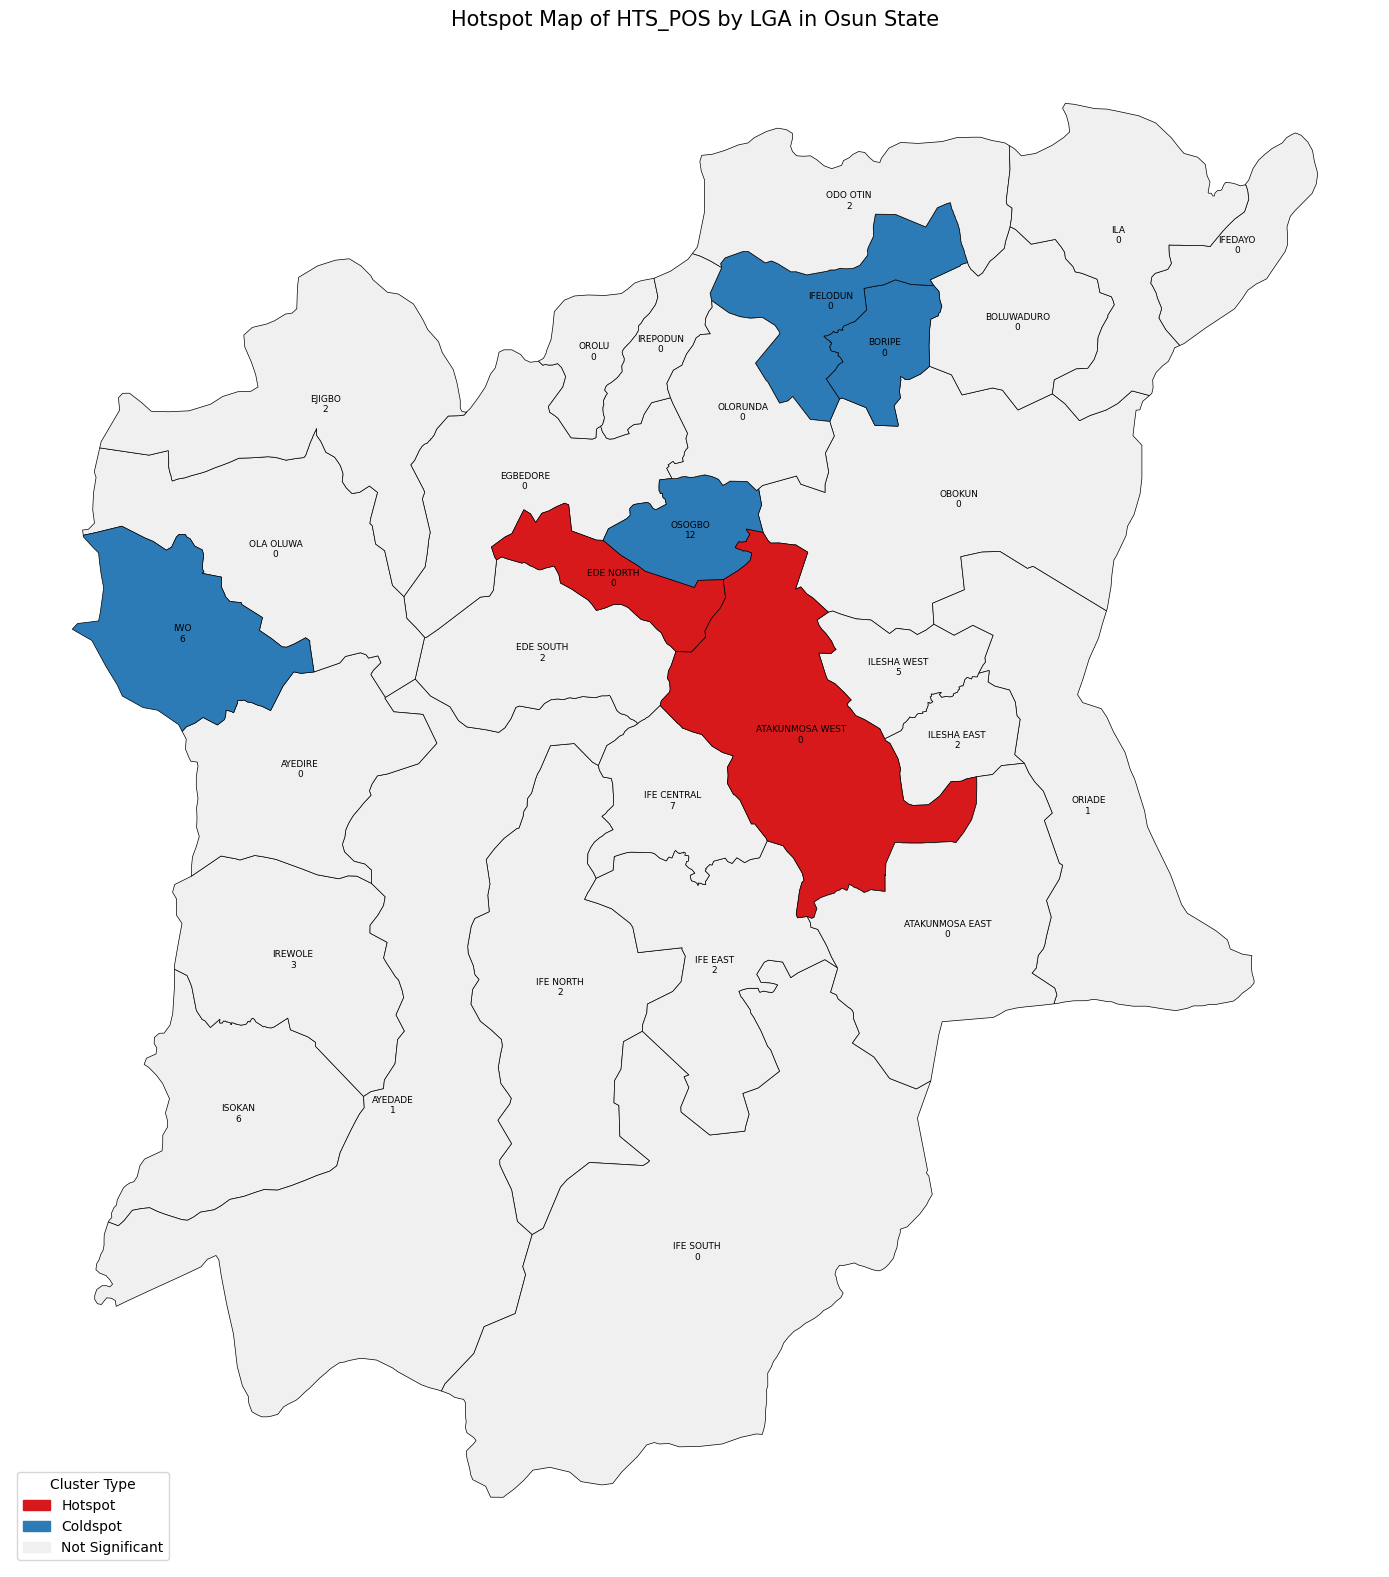

In [27]:
fig, ax = plt.subplots(figsize=(14, 16))

# Define custom colors for hotspot classification
color_dict = {
    'Hotspot': '#d7191c',        # Red
    'Coldspot': '#2c7bb6',       # Blue
    'Not Significant': '#f0f0f0' # Light gray
}

# Assign colors from classification
merged['spot_color'] = merged['Hotspot'].map(color_dict)

# Plot polygons
merged.plot(
    color=merged['spot_color'],
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Add LGA labels and TX_Cur at centroids
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        lga_name = row['lganame']
        HTS_Pos = row['HTS_Pos']
        label = f"{lga_name}\n{int(HTS_Pos)}"
        ax.annotate(
            text=label,
            xy=(centroid.x, centroid.y),
            ha='center',
            va='center',
            fontsize=6.5,
            color='black'
        )

# Add a custom legend
legend_patches = [
    mpatches.Patch(color=color_dict['Hotspot'], label='Hotspot'),
    mpatches.Patch(color=color_dict['Coldspot'], label='Coldspot'),
    mpatches.Patch(color=color_dict['Not Significant'], label='Not Significant')
]
ax.legend(handles=legend_patches, title='Cluster Type', loc='lower left')

# Final formatting
plt.title("Hotspot Map of HTS_POS by LGA in Osun State", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


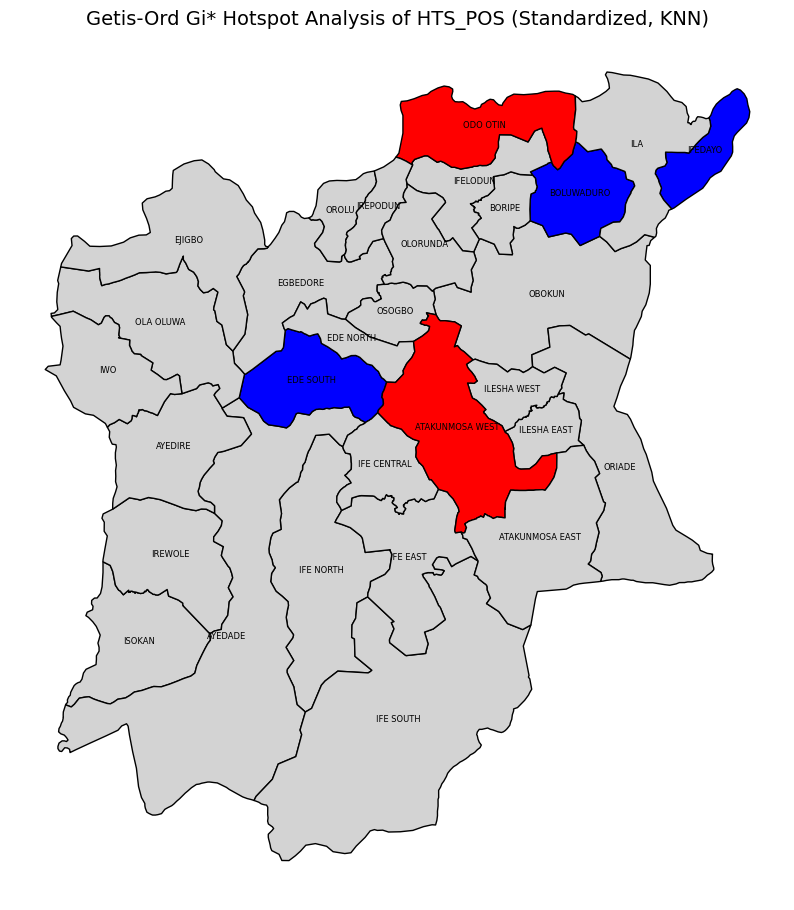

In [28]:
# Step 1: Standardize TX_CUR using z-score
merged['HTS_Pos_std'] = zscore(merged['HTS_Pos'].fillna(0))  # fillna if needed

# Step 2: Create KNN spatial weights (e.g., 4 neighbors)
w_knn = KNN.from_dataframe(merged, k=4)
w_knn.transform = 'r'  # row-standardize weights

# Step 3: Calculate Getis-Ord Gi* using standardized values
gi_star = getisord.G_Local(merged['HTS_Pos_std'].values, w_knn)

# Step 4: Add Gi* results to dataframe
merged['GiZScore'] = gi_star.Zs
merged['GiPValue'] = gi_star.p_sim
merged['GiSignificant'] = gi_star.p_sim < 0.05  # flag significant clusters

# Step 5: Classify hotspot / coldspot / non-significant
def classify_hotspot(row):
    if not row['GiSignificant']:
        return 'Not Significant'
    elif row['GiZScore'] > 0:
        return 'Hotspot'
    else:
        return 'Coldspot'

merged['Hotspot_Class'] = merged.apply(classify_hotspot, axis=1)

# Step 6: Plotting
fig, ax = plt.subplots(figsize=(10, 15))
color_dict = {'Hotspot': 'red', 'Coldspot': 'blue', 'Not Significant': 'lightgrey'}

merged.plot(color=merged['Hotspot_Class'].map(color_dict), ax=ax, edgecolor='black')

# Annotate LGAs
for idx, row in merged.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['lganame'],
            xy=(centroid.x, centroid.y),
            ha='center', fontsize=6, color='black'
        )

plt.title("Getis-Ord Gi* Hotspot Analysis of HTS_POS (Standardized, KNN)", fontsize=14)
plt.axis('off')
plt.show()


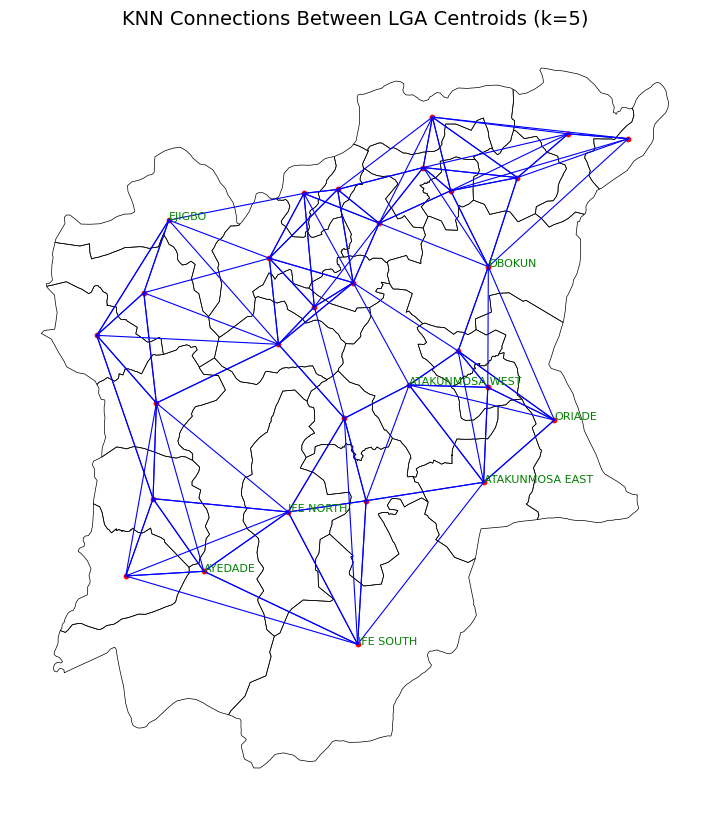

In [29]:
from shapely.geometry import Point
import matplotlib.lines as mlines

# 1. Project to a metric CRS (e.g., UTM Zone 31N for Nigeria)
gdf_projected = osun_state.to_crs(epsg=32631)

# 2. Calculate centroids
gdf_projected['centroid'] = gdf_projected.geometry.centroid

# 3. Extract coordinates
coords = np.array([(point.x, point.y) for point in gdf_projected['centroid']])

# 4. Create KNN weights (e.g., k=5)
knn = KNN.from_array(coords, k=5)

# 5. Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_projected.boundary.plot(ax=ax, color='black', linewidth=0.5)
gdf_projected['centroid'].plot(ax=ax, color='red', markersize=10)

# Draw KNN connections
for i, neighbors in knn.neighbors.items():
    origin = coords[i]
    for j in neighbors:
        dest = coords[j]
        ax.plot([origin[0], dest[0]], [origin[1], dest[1]], color='blue', linewidth=0.8)

# Annotate large LGAs (optional): those with area above a threshold
gdf_projected['area_km2'] = gdf_projected.geometry.area / 1e6
large_lgas = gdf_projected[gdf_projected['area_km2'] > gdf_projected['area_km2'].quantile(0.75)]
for idx, row in large_lgas.iterrows():
    ax.annotate(row['lganame'], (row['centroid'].x, row['centroid'].y), fontsize=8, color='green')

ax.set_title('KNN Connections Between LGA Centroids (k=5)', fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
# save the shapefile for osun state
osun_state.to_file('osun_state.shp')

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field timestamp create as date field, though DateTime requested.
  ogr_write(


In [ ]:
# get the crs for my data
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# get the boundary
data.total_bounds

array([ 2.69261254,  4.27020399, 14.67796775, 13.88571399])

In [ ]:
osun_state.total_bounds

array([4.05292892, 6.98073483, 5.05763292, 8.09550285])

In [ ]:
# get the area of osun state
osun_state.area

<ipython-input-27-4e02bfffc1d2>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  osun_state.area


,0
35,0.021750
36,0.023394
50,0.035492
51,0.081189
52,0.022084
91,0.009142
444,0.017793
468,0.041833
497,0.085617
513,0.023569


In [ ]:
# get plt.the centroids of osun_state
osun_state.centroid

<ipython-input-28-4d97852e1587>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  osun_state.centroid


,0
35,POINT (4.18687 7.28769)
36,POINT (4.23075 7.41087)
50,POINT (4.44666 7.38901)
51,POINT (4.3117 7.29482)
52,POINT (4.23653 7.56335)
91,POINT (4.99273 7.98216)
444,POINT (4.43198 7.65651)
468,POINT (4.76802 7.77908)
497,POINT (4.55684 7.1776)
513,POINT (4.41789 7.79383)


In [ ]:
# GeoSeries.concave_hull
osun_state.convex_hull

,0
35,"POLYGON ((4.09009 7.19787, 4.08199 7.2009, 4.1..."
36,"POLYGON ((4.28791 7.30129, 4.16435 7.35649, 4...."
50,"POLYGON ((4.42392 7.19077, 4.41199 7.2013, 4.3..."
51,"POLYGON ((4.21003 7.04507, 4.20597 7.04508, 4...."
52,"POLYGON ((4.29435 7.47165, 4.14904 7.47746, 4...."
91,"POLYGON ((4.94628 7.90182, 4.93492 7.91461, 4...."
444,"POLYGON ((4.39694 7.59245, 4.37132 7.5968, 4.3..."
468,"POLYGON ((4.73463 7.67065, 4.71223 7.67146, 4...."
497,"POLYGON ((4.40054 6.98073, 4.39038 6.98085, 4...."
513,"POLYGON ((4.33713 7.66845, 4.32282 7.68359, 4...."


In [ ]:
# GeoSeries.extract_unique_points()
osun_state.extract_unique_points()

,0
35,"MULTIPOINT (4.23003 7.23011, 4.21843 7.22639, ..."
36,"MULTIPOINT (4.24922 7.34134, 4.24917 7.34465, ..."
50,"MULTIPOINT (4.51874 7.24976, 4.51682 7.2481, 4..."
51,"MULTIPOINT (4.39773 7.25062, 4.39778 7.24669, ..."
52,"MULTIPOINT (4.33585 7.60685, 4.34702 7.58378, ..."
91,"MULTIPOINT (5.00035 7.94477, 4.99664 7.93921, ..."
444,"MULTIPOINT (4.45422 7.62018, 4.45198 7.61963, ..."
468,"MULTIPOINT (4.76971 7.73294, 4.77263 7.70652, ..."
497,"MULTIPOINT (4.53752 7.02269, 4.53417 7.02376, ..."
513,"MULTIPOINT (4.48543 7.75526, 4.48112 7.74602, ..."
